<a href="https://colab.research.google.com/github/Vinayak-Sharma12/ML-Algorithms/blob/main/Decision_Tree_Classifier_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.Importing Essential Libraries**

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## **2. Importing Dataset**

In [2]:
df=pd.read_csv("/content/Social_Network_Ads.csv")

In [5]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [26]:
df.shape

(400, 3)

### **Features**

In [50]:
X=df.iloc[: ,:2]

In [51]:
X.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


### **Target**

In [52]:
Y=df.iloc[:,-1]

In [53]:
Y.head()

,Purchased
0,0
1,0
2,0
3,0
4,0


## **3. Splitting the Dataset into Training and Testing**

In [54]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [41]:
x_train

,Age,EstimatedSalary
247,57,122000
110,39,71000
16,47,25000
66,24,19000
153,36,50000
...,...,...
71,24,27000
106,26,35000
270,43,133000
348,39,77000


In [55]:
y_train

,Purchased
250,0
63,1
312,0
159,1
283,1
...,...
323,1
192,0
117,0
47,0


In [56]:
x_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
146,27,96000
135,23,63000
390,48,33000
264,48,90000


In [57]:
y_test

,Purchased
132,0
309,0
341,0
196,0
246,0
...,...
146,1
135,0
390,1
264,1


### **Important Note:Feature Scaling is not usually required in D.T**
###  **Because**
    Decision Tree doesn’t need scaling because it only checks whether a value is bigger or smaller than a number — not how big it is.

    Even simpler:

    It only asks:
    “Is this value ≤ some threshold?”

    Not:
    “How far is this value?” or “How large is this value?”

    That’s why scaling doesn’t matter.

## **Hyper-Parameter Tuning**

In [80]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

**Intialize Grid Search CV(cross-validation)**

In [82]:

from sklearn.model_selection import GridSearchCV
dt_classifier = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

In [83]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [84]:
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

Best parameters found: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


## **4. Training Decision Tree classifier Model**

In [86]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy",max_depth=5,min_samples_leaf=4, min_samples_split=2,random_state=0)   #default criterion of D.T= gini

In [87]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       random_state=0)

## **5. Evaluate the Model on Test Data**

In [88]:
y_pred = classifier.predict(x_test)

In [89]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [90]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.94


## **6. Confusion Matrix**

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[65,  3],
       [ 3, 29]])

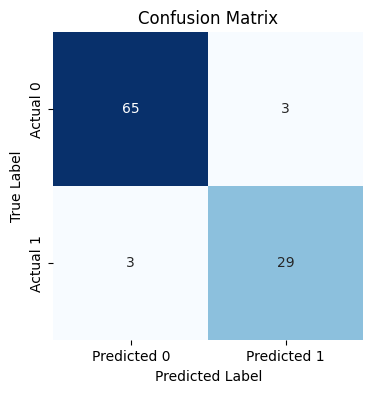

In [92]:
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# **7. Draw Decision Tree for the classifier**

[Text(0.5769230769230769, 0.9, 'x[0] <= 42.5\nentropy = 0.904\nsamples = 100\nvalue = [68, 32]'),
 Text(0.3076923076923077, 0.7, 'x[1] <= 92500.0\nentropy = 0.494\nsamples = 74\nvalue = [66, 8]'),
 Text(0.4423076923076923, 0.8, 'True  '),
 Text(0.15384615384615385, 0.5, 'x[0] <= 36.0\nentropy = 0.196\nsamples = 66\nvalue = [64, 2]'),
 Text(0.07692307692307693, 0.3, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.23076923076923078, 0.3, 'x[1] <= 78000.0\nentropy = 0.503\nsamples = 18\nvalue = [16, 2]'),
 Text(0.15384615384615385, 0.1, 'entropy = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.3076923076923077, 0.1, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.46153846153846156, 0.5, 'x[0] <= 35.0\nentropy = 0.811\nsamples = 8\nvalue = [2, 6]'),
 Text(0.38461538461538464, 0.3, 'entropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(0.5384615384615384, 0.3, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8461538461538461, 0.7, 'x[1] <= 84500.0\nentropy = 0.391\nsample

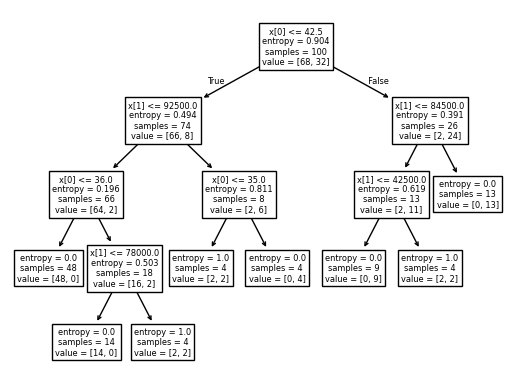

In [93]:
from sklearn import tree

tree.plot_tree(classifier.fit(x_test, y_test))

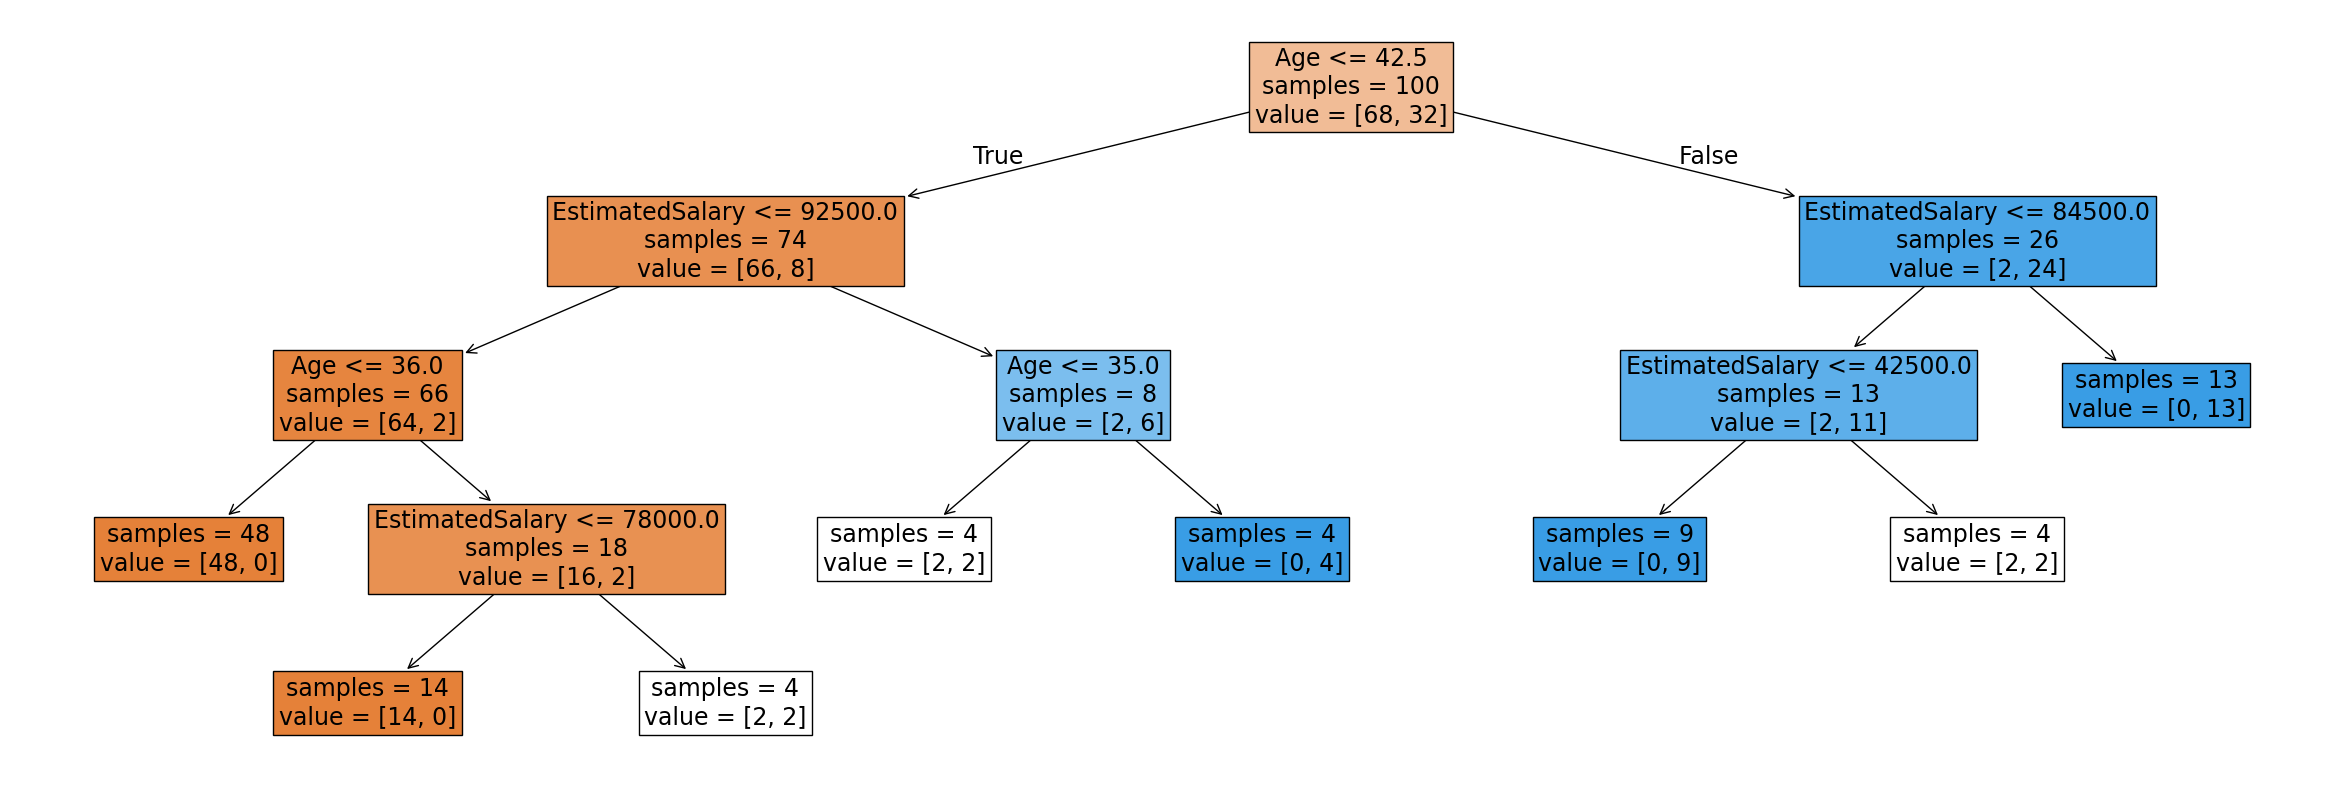

In [94]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30, 10))
plot_tree(
    classifier,
    feature_names=['Age',"EstimatedSalary"],
    impurity=False,
    filled=True,
    fontsize=17
)
plt.show()